# Validation Basics
  
This chapter focuses on the basics of model validation. From splitting data into training, validation, and testing datasets, to creating an understanding of the bias-variance tradeoff, we build the foundation for the techniques of K-Fold and Leave-One-Out validation practiced in chapter three.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating train, test, and validation datasets
  
Let's get started with creating training, testing, and validation datasets.
  
**Traditional train/test split**
  
In the first few lessons, we called data "seen" data if it was used for model fitting, while "unseen" data described the data we did not train our model on. In model validation, we use holdout samples to replicate this idea. We define a holdout dataset as any data that is not used for training and is only used to assess model performance. The available data is split into two datasets. One used for training, and one that is simply off limits while we are training our models, called a test (or holdout) dataset. This step is vital to model validation and is the number one step you can take to ensure your model's performance.
  
<img src='../_images/train-test-split-holdout-validation-sets.png' text='alt text' width='700'>
  
**Dataset definitions and ratios**
  
We use the holdout sample as a testing dataset so that we can have an unbiased estimate for our model's performance after we are completely done training. Generally, a good rule of thumb is using an 80/20 split. This equates to setting aside twenty percent of the data for the test set and using the rest for training. You might choose to use more training data when the overall data is limited, or less training data if the modeling method is computationally expensive.
  
<img src='../_images/train-test-split-holdout-validation-sets1.png' text='alt text' width='700'>
  
**The X and y datasets**
  
Before we use scikit-learn's holdout creation function `train_test_split()`, we will use the `tic_tac_toe` dataset and create an `X` dataset with the predictive data, and a `y` dataset with just the responses. The first nine columns of `tic_tac_toe` can be used for training, while the 10th column contains the response values. As a quick aside, classification models for categorical values, such as those found in the `tic_tac_toe` dataset, require dummy variables. 
  
<img src='../_images/train-test-split-holdout-validation-sets2.png' text='alt text' width='740'>
  
**Creating holdout samples**
  
The `train_test_split()` function is straightforward. We split both the `X` and the `y` datasets, into both a train and a test dataset. This function has a few parameters that we will use. `test_size=` takes either a float or an integer and specifies how big the test set should be. If `test_size=` is blank, you can instead use `train_size=` to set the size of the training set. And finally, `random_state=` allows for setting the model seed and helps maintain reproducibility.
  
**Dataset for preliminary testing?**
  
We know that the test set is off limits until we are completely done training, but what do we do when testing model parameters? For example, if we run a random forest model with 100 trees and one with 1000 trees, which dataset do we use to test these results?
  
**Holdout samples for parameter tuning**
  
When testing parameters, tuning hyper-parameters, or anytime we are frequently evaluating model performance we need to create a second holdout sample, called the validation dataset. For this dataset, the available data is the original training dataset, which is then split in the same manner used to split the original complete dataset. We use the validation sample to assess our model's performance when using different parameter values.
  
<img src='../_images/train-test-split-holdout-validation-sets3.png' text='alt text' width='740'>
  
**Train, validation, test continued**
  
To create both holdout samples, the testing, and the validation datasets, we use scikit-learn's `train_test_split()` function twice. The first call will create training and testing datasets like normal. The second call we split this so-called temporary training dataset into the final training and validation datasets. In this example, we first used an 80/20 split to create the test set. With the 80% training dataset, we used a 75/25 split to create a validation dataset. Leaving us with 60% of the data for training, 20% for validation, and 20% for testing.
  
<img src='../_images/train-test-split-holdout-validation-sets4.png' text='alt text' width='740'>

**It's holdout time**
  
Let's practice making holdout sets to use in our models.

### Create one holdout set
  
Your boss has asked you to create a simple random forest model on the `tic_tac_toe` dataset. She doesn't want you to spend much time selecting parameters; rather she wants to know how well the model will perform on future data. For future Tic-Tac-Toe games, it would be nice to know if your model can predict which player will win.
  
The dataset `tic_tac_toe` has been loaded for your use.
  
Note that in Python, `=\` indicates the code was too long for one line and has been split across two lines.
  
1. Create the `X` dataset by creating dummy variables for all of the categorical columns.
2. Split `X` and `y` into train (`X_train`, `y_train`) and test (`X_test`, `y_test`) datasets.
3. Split the datasets using 10% for testing

In [2]:
tic_tac_toe = pd.read_csv('../_datasets/tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [3]:
from sklearn.model_selection import train_test_split


# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])  # All observations and the 0-8 (9 total) features
y = tic_tac_toe.iloc[:, 9]  # All observations for the 10th (index=9) column

print('X shape: ', X.shape)
print('y shape: ', y.shape)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)


print('\nX_train shape: ', X_train.shape)
print('X_test shape:  ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape:  ', y_test.shape)

X shape:  (958, 27)
y shape:  (958,)

X_train shape:  (862, 27)
X_test shape:   (96, 27)
y_train shape:  (862,)
y_test shape:   (96,)


Remember, without the holdout set, you cannot truly validate a model. Let's move on to creating two holdout sets.

### Create two holdout sets
  
You recently created a simple random forest model to predict Tic-Tac-Toe game wins for your boss, and at her request, you did not do any parameter tuning. Unfortunately, the overall model accuracy was too low for her standards. This time around, she has asked you to focus on model performance.
  
Before you start testing different models and parameter sets, you will need to split the data into training, validation, and testing datasets. Remember that after splitting the data into training and testing datasets, the validation dataset is created by splitting the training dataset.
  
The datasets `X` and `y` have been loaded for your use.
  
1. Create temporary datasets and testing datasets (`X_test`, `y_test`). Use 20% of the overall data for the testing datasets.
2. Using the temporary datasets (`X_temp`, `y_temp`), create training (`X_train`, `y_train`) and validation (`X_val`, `y_val`) datasets.
3. Use 25% of the temporary data for the validation datasets.

In [4]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)

You now have training, validation, and testing datasets, but do you know *when* you need both validation and testing datasets? Keep going! The next exercise will help make sure you understand when to use validation datasets.

### Why use holdout sets
  
It is important to understand when you would use three datasets (training, validation, and testing) instead of two (training and testing). There is no point in creating an additional dataset split if you are not going to use it.
  
When should you consider using training, validation, and testing datasets?
  
Possible Answers
  
- [ ] When there is a lot of data. Splitting into three sets helps speed up modeling.
- [x] When testing parameters, tuning hyper-parameters, or anytime you are frequently evaluating model performance.
- [ ] Only when you are running regression and not classification models.
- [ ] Only when you are running classification and not regression models.
  
Correct! Anytime we are evaluating model performance repeatedly we need to create training, validation, and testing datasets.

## Accuracy metrics: regression models
  
Now that we have learned about holdout samples let's discuss accuracy metrics used when validating models — starting with regression models.
  
**Regression models**
  
Remember, regression models are built for continuous variables. This could be predicting the number of points a player will score tomorrow, or the number of puppies a dog is about to have!
  
**Mean absolute error (MAE)**
  
To assess the performance of a regression model, we can use the mean absolute error. It is the simplest and most intuitive error metric and is the average absolute difference between the predictions ($\hat y_i$) and the actual values ($y_i$). If your dog had six puppies, but you had predicted only four, the absolute difference would be two. This metric treats all points equally and is not sensitive to outliers. When dealing with applications where we don't want large errors to have a major impact, the mean absolute error can be used. An example could be predicting your car's monthly gas bill, when an outlier may have been caused by a one-time road trip.
  
- Simplest and most intuitive metric
- Treats all points equally
- Not sensitive to outliers
  
$formula:$  
  
$\Large {MAE}= \frac {\sum_{i=1}^{n} {|y_i - \hat y_i|}}{n}$
  
$let:$

$MAE =$ mean absolute error  
$n =$ number of data points  
$y_{i} =$ observed/true values  
$\hat{y}_{i} =$ predicted values  
  
**Mean squared error (MSE)**
  
Next is the mean squared error (MSE). It is the most widely used regression error metric for regression models. It is calculated similarly to the mean absolute error, but this time we square the difference term. The MSE allows larger errors to have a larger impact on the model. Using the previous car example, if you knew once a year you might go on a road trip, you might expect to occasionally have a large error and would want your model to pick up on these trips.
  
- Most widely used regression metric
- Allows outlier errors to contribute more to the overall error
- Random family road trips could lead to large errors in predictions

$formula:$  
  
$\Large {MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2$
  
$let:$
  
$MSE =$ mean squared error  
$n =$ number of data points  
$y_{i} =$ observed/true values  
$\hat{y}_{i} =$ predicted values  
  
**MAE vs. MSE**
  
Picking between the MAE and the MSE comes down to the application. These results are in different units though and should not be directly compared!
  
**Mean absolute error**
  
To practice these metrics, let's use the ultimate Halloween candy data dataset. Here we are predicting the win-percentage of candies in head-to-head match-ups with other candies. Let's assume we have already fit a random forest model and calculated predictions for the test dataset. For the mean absolute error, we can calculate this two ways. A manual calculation, which takes the sum of the absolute differences and divides by the total number of observations, or we can use scikit-learn's `mean_absolute_error()` function. We provide an array of the actual values, followed by an array of the predictions. Both methods produce a single value of 9.99 as the output. We are covering the manual calculations for these functions to understand the results of these error metrics. Notice that we are looking at the test data accuracy. This error means that we are about 10 percentage-points off on average when predicting the win-percentage. As win-percentages range from 0 to 1, this is fairly good.
  
<img src='../_images/mae-mse-test-metrics.png' text='alt text' width= '740'>
  
**Mean squared error**
  
For the mean squared error, we can calculate this manually or with the `mean_squared_error()` function. Both methods produce a value of 141.4. In this example, the mean squared error is a more appropriate accuracy metric, as we want outliers to have more of an impact on the model's performance. For example, if one chocolate bar really underperforms, there may be attributes of that chocolate bar that truly matter other than it being chocolate.
  
<img src='../_images/mae-mse-test-metrics1.png' text='alt text' width= '740'>

**Accuracy for a subset of data**
  
Sometimes we want to know a model's accuracy for a specific subset, such as how this model performs on only chocolate candies. If column 1 in our test set has 1's for candies containing chocolate, and 0; otherwise, we filter the test array based on these values and run the accuracy metrics. Since the chocolate candies had errors of less than 9 and the non-chocolate candies had errors of 11, the model performed better on chocolate candy.
  
<img src='../_images/mae-mse-test-metrics2.png' text='alt text' width= '740'>
  
**Let's practice**
  
Let's work through a couple of examples on regression accuracy metrics.

### Mean absolute error
  
Communicating modeling results can be difficult. However, most clients understand that on average, a predictive model was off by some number. This makes explaining the mean absolute error easy. For example, when predicting the number of wins for a basketball team, if you predict 42, and they end up with 40, you can easily explain that the error was two wins.
  
In this exercise, you are interviewing for a new position and are provided with two arrays. `y_test`, the true number of wins for all 30 NBA teams in 2017 and `predictions`, which contains a prediction for each team. To test your understanding, you are asked to both manually calculate the MAE and use sklearn.
  
1. Manually calculate the MAE using n as the number of observations predicted.
2. Calculate the MAE using sklearn.
3. Print off both accuracy values using the print statements.

In [5]:
# Parsed this from the exercise to simulate, unattainable otherwise.
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])

predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])

In [6]:
from sklearn.metrics import mean_absolute_error


# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

With a manual calculation, the error is 5.9
Using scikit-learn, the error is 5.9


These predictions were about six wins off on average. This isn't too bad considering NBA teams play 82 games a year. Let's see how these errors would look if you used the mean squared error instead.

### Mean squared error
  
Let's focus on the 2017 NBA predictions again. Every year, there are at least a couple of NBA teams that win way more games than expected. If you use the MAE, this accuracy metric does not reflect the bad predictions as much as if you use the MSE. Squaring the large errors from bad predictions will make the accuracy look worse.
  
In this example, NBA executives want to better predict team wins. You will use the mean squared error to calculate the prediction error. The actual wins are loaded as `y_test` and the predictions as `predictions`.
  
1. Manually calculate the MSE.
2. Calculate the MSE using sklearn.
3. Print off both accuracy values using the print statements.

In [7]:
from sklearn.metrics import mean_squared_error


# Finish the manual calculation of the MSE
n = len(predictions)
mse_one = sum((y_test - predictions) ** 2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 49.1
Using scikit-learn, the error is 49.1


Good job! If you run any additional models, you will try to beat an MSE of 49.1, which is the average squared error of using your model. Although the MSE is not as interpretable as the MAE, it will help us select a model that has fewer 'large' errors.

### Performance on data subsets
  
In professional basketball, there are two conferences, the East and the West. Coaches and fans often only care about how teams in their own conference will do this year.
  
You have been working on an NBA prediction model and would like to determine if the predictions were better for the East or West conference. You added a third array to your data called `labels`, which contains an "E" for the East teams, and a "W" for the West. `y_test` and `predictions` have again been loaded for your use.
  
1. Create an array `east_teams` that can be used to filter `labels` to East conference teams.
2. Create the arrays `true_east` and preds_east by filtering the arrays `y_test` and `predictions`.
3. Use the `print()` statements to print the MAE (using scikit-learn) for the East conference. The `mean_absolute_erro`r function has been loaded `as mae`.
4. The variable `west_error` contains the MAE for the West teams. Use the `print()` statement to print out the Western conference MAE.

In [8]:
# Snipped from the exercise, unattainable otherwise
labels= np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W'])

In [9]:
from sklearn.metrics import mean_absolute_error as mae


# Find the East conference teams, ndarray of boolean values (MASK)
east_teams = labels == 'E'

# Create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

# Find the West conference teams, ndarray of boolean values (MASK)
west_teams = labels == 'W'

# Create arrays for the true and predicted values
true_west = y_test[west_teams]
preds_west = predictions[west_teams]

# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mae(true_east, preds_east)))

# Print the west accuracy
print('The MAE for West teams is {}'.format(mae(true_west, preds_west)))

The MAE for East teams is 6.733333333333333
The MAE for West teams is 5.066666666666666


Over the past few seasons, the Western teams have generally won the same number of games as the experts have predicted. Teams in the East are just not as predictable as those in the West.
  
NOTE: The statement in the exercise "It looks like the Western conference predictions were about two games better on average" is an incorrect statement while also being misleading. You can not interprete evaluation MAE, MAPE, MSE, or RMSE in such a way, they are used only as distance points between ones-self.

## Classification metrics
  
We already understand classification models; now let's look at their accuracy metrics.
  
**Classification metrics**
  
Classification accuracy metrics are quite a bit different than regression ones. Remember, with classification models; we are predicting what category an observation falls into. There are a lot of accuracy metrics available. There is precision, recall, accuracy, specificity, F1-Score, alternate forms of the F1-score, and several others.
  
<!DOCTYPE html>
<html>
<body>
    <table>
        <tr>
            <th>Metric</th>
            <th>Purpose</th>
        </tr>
        <tr>
            <td>Precision</td>
            <td>Measures the proportion of correctly predicted positive instances out of the total predicted positive instances. It focuses on the accuracy of positive predictions.</td>
        </tr>
        <tr>
            <td>Recall (Sensitivity)</td>
            <td>Measures the proportion of correctly predicted positive instances out of the total actual positive instances. It focuses on the coverage of positive instances.</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>Measures the proportion of correctly predicted instances (both positive and negative) out of the total instances. It provides an overall measure of model performance.</td>
        </tr>
        <tr>
            <td>Specificity</td>
            <td>Measures the proportion of correctly predicted negative instances out of the total actual negative instances. It focuses on the coverage of negative instances.</td>
        </tr>
        <tr>
            <td>F1-Score (and its variations)</td>
            <td>Combines precision and recall into a single metric, providing a balanced measure of model performance. It is useful when the data is imbalanced or when both precision and recall are important.</td>
        </tr>
    </table>
</body>
</html>
  
**Classification metrics**
  
We will focus on precision, recall, and accuracy. As each of these are easy to understand and have very practical applications. One way to calculate these metrics is to use the values from the confusion matrix.
  
**Confusion matrix**
  
When making predictions, especially if there is a binary outcome, this matrix is one of the first outputs you should review. When we have a binary outcome, the confusion matrix is a 2x2 matrix that shows how your predictions faired across the two outcomes. For example, for predictions of 0 that were actually 0 (or true negatives), we look at the 0, 0 square of the matrix. All of the accuracy metrics from the previous slide can be calculated using the values from this matrix, and it is a great way to visualize the initial results of your classification model.
  
<html>
<body>
    <table>
        <tr>
            <th></th>
            <th>Predicted Negative (0)</th>
            <th>Predicted Positive (1)</th>
        </tr>
        <tr>
            <td>Actual Negative (0)</td>
            <td>True Negative (TN) (A0P0)</td>
            <td>False Positive (FP) (A0P1)</td>
        </tr>
        <tr>
            <td>Actual Positive (1)</td>
            <td>False Negative (FN) (A1P0)</td>
            <td>True Positive (TP) (A1P1)</td>
        </tr>
    </table>
</body>
</html>
  
**Create confusion matrix with scikit-learn**
  
We can create a confusion matrix using scikit-learn's function `confusion_matrix()`. When dealing with binary data, this will print out a 2x2 array which represents the confusion matrix. In this matrix, the row index represents the true category, and the column index represents the predicted category. Therefore, the 1, 0 entry of the array represents the number of true 1s that were predicted to be 0, or 8 in this example.
  
<img src='../_images/confusion-matrix-in-sklearn-evaluation.png' text='alt text' width='740'>
  
**Accuracy**
  
Accuracy is the easiest metric to understand and represents the overall ability of your model to correctly predict the correct classification. Using the confusion matrix, we add the values that were predicted 0 and actually are 0 (which are called true negatives), to the values predicted to be 1 that are 1 (called true positives), and then divide by the total number of observations. In this case, our accuracy was 85%. In this example, you can associate a true positive as predicted 1's that are also actually 1's. However, if your categories were win or loss, you might associate a true positive as the number of predicted wins that were actually wins.
  
<img src='../_images/confusion-matrix-in-sklearn-evaluation1.png' text='alt text' width='720'>
  
**Precision**
  
Next is precision or the number of true positives out of all predicted positive values. We correctly predicted 62 true values but also predicted 7 false positives. Therefore, the precision is 62 divided by 69. Precision is used when we don't want to overpredict positive values. If it cost $2,000 to fly-in potential new employee's, a company may only have on-campus interviews with individuals that they really believe are going to join their company. In the example data, almost 9 out of 10 predicted 1's would have joined the company.
  
<img src='../_images/confusion-matrix-in-sklearn-evaluation2.png' text='alt text' width='720'>
  
**Recall**
  
The recall metric is about finding all positive values. Here we correctly predicted 62 true positives and had 8 false negatives. Our recall is 62 out of 70. Recall is used when we can't afford to miss any positive values. For example, even if a patient has a small chance of having cancer, we may want to give them additional tests. The cost of missing a patient who has cancer is far greater than the cost of additional screenings for that patient.
  
<img src='../_images/confusion-matrix-in-sklearn-evaluation3.png' text='alt text' width='720'>
  
**Accuracy, precision, recall**
  
Accuracy, precision, and recall are called similarly. Use the desired accuracy metric function and provide the true and predicted values. A single value will be produced as a result. In this example, we got the same values that we calculated using the confusion matrix.
  
<img src='../_images/confusion-matrix-in-sklearn-evaluation4.png' text='alt text' width='740'>
  
**Practice time**
  
Let's work through a couple of examples using these accuracy metrics.

### Confusion matrices
  
Confusion matrices are a great way to start exploring your model's accuracy. They provide the values needed to calculate a wide range of metrics, including sensitivity, specificity, and the F1-score.
  
You have built a classification model to predict if a person has a broken arm based on an X-ray image. On the testing set, you have the following confusion matrix:
  
<html>
<body>
    <table>
        <tr>
            <th></th>
            <th>Predicted Negative (0)</th>
            <th>Predicted Positive (1)</th>
        </tr>
        <tr>
            <td>Actual Negative (0)</td>
            <td>324 (True Negative) (A0P0)</td>
            <td>15 (False Positive) (A0P1)</td>
        </tr>
        <tr>
            <td>Actual Positive (1)</td>
            <td>123 (False Negative) (A1P0)</td>
            <td>491 (True Positive) (A1P1)</td>
        </tr>
    </table>
</body>
</html>
  
1. Use the confusion matrix to calculate overall accuracy.
2. Use the confusion matrix to calculate precision and recall.
3. Use the three print statements to print each accuracy value.

In [10]:
# Calculate and print the accuracy (TN+TP)/(TN+FP+FN+TP)
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision (TP)/(TP+FP)
precision = (491) / (15 + 491)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall (TP)/(FN+TP)
recall = (491) / (123 + 491)
print("The recall is {0: 0.2f}".format(recall))

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80


In this case, a true positive is a picture of an actual broken arm that was also predicted to be broken. Doctors are okay with a few additional false positives (predicted broken, not actually broken), as long as you don't miss anyone who needs immediate medical attention.

### Confusion matrices, again
  
Creating a confusion matrix in Python is simple. The biggest challenge will be making sure you understand the orientation of the matrix. This exercise makes sure you understand the sklearn implementation of confusion matrices. Here, you have created a random forest model using the `tic_tac_toe` dataset `rfc` to predict outcomes of 0 (loss) or 1 (a win) for Player One.
  
Note: If you read about confusion matrices on another website or for another programming language, the values might be reversed.
  
1. Import sklearn's function for creating confusion matrices.
2. Using the model `rfc`, create category predictions on the test set `X_test`.
3. Create a confusion matrix using sklearn.
4. Print the value from `cm` that represents the actual 1s that were predicted as 1s (true positives).

In [11]:
# Loading the required dataset
tic_tac_toe = pd.read_csv('../_datasets/tic-tac-toe.csv')

# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])    # All observations, features: [0,1,2,3,4,5,6,7,8] = 9
y = tic_tac_toe.iloc[:, 9]                      # Extract the target, all observations, feature 9
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)  # Feature label "Class" convert to one-hot

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

In [12]:
from sklearn.ensemble import RandomForestClassifier


# Model instantiation
rfc = RandomForestClassifier(n_estimators=500, random_state=1111)  # 500 decision trees

# Fitting model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1111)

In [13]:
from sklearn.metrics import confusion_matrix


# Create predictions, y_pred
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print('The number of true negatives is: {}'.format(cm[0, 0]))
print('The number of false positives is: {}'.format(cm[0, 1]))
print('The number of false negatives is: {}'.format(cm[1, 0]))
print('The number of true positives is: {}'.format(cm[1, 1]))

[[28  2]
 [ 0 66]]
The number of true negatives is: 28
The number of false positives is: 2
The number of false negatives is: 0
The number of true positives is: 66


Row 1, column 1 represents the number of actual 1s that were predicted 1s (the true positives). Always make sure you understand the orientation of the confusion matrix before you start using it!

### Precision vs. recall
  
The accuracy metrics you use to evaluate your model should always be based on the specific application. For this example, let's assume you are a really sore loser when it comes to playing Tic-Tac-Toe, but only when you are certain that you are going to win.
  
Choose the most appropriate accuracy metric, either precision or recall, to complete this example. But remember, if you think you are going to win, you better win!
  
Use `rfc`, which is a random forest classification model built on the `tic_tac_toe` dataset.
  
1. Import the precision or the recall metric for sklearn. Only one method is correct for the given context.
2. Calculate the precision or recall using `y_test` for the true values and `test_predictions` for the predictions.
3. Print the final score based on your selected metric.

In [14]:
from sklearn.metrics import precision_score, recall_score


# y_pred
test_predictions = rfc.predict(X_test)

# Create precision score based on the metric
p_score = precision_score(y_test, test_predictions)
r_score = recall_score(y_test, test_predictions)

# Print the final result
print('The precision value is {0:.2f}, The recall value is {1:.2f}'.format(p_score, r_score))

The precision value is 0.97, The recall value is 1.00


Precision is the correct metric here. Sore-losers can't stand losing when they are certain they will win! For that reason, our model needs to be as precise as possible.
  
Precision is specifically focused on evaluating the reliability of positive predictions. It answers the question, "Of all the instances predicted as positive, how many are actually positive?" A higher precision value indicates a lower rate of false positives, meaning that the model is making fewer incorrect positive predictions.

Precision is particularly useful in scenarios where the cost or consequences of false positives are high, such as in medical diagnosis or spam email detection. A high precision value implies that when the model predicts an instance as positive, it is likely to be correct.

## The bias-variance tradeoff
  
Let's try to identify when we have a good fitting model.
  
**Variance**
  
One way to do this is to consider bias and variance. Variance occurs when a model pays too close attention to the training data and fails to generalize to the testing data. These models perform well on only the training data, but not the testing data, and are considered to be overfit.
  
- Variance: Following the training data too closely
- Fails to generalize to the test data
- Low training error, but high testing error
- Occurs when models are overfit and have high complexity
  
**Overfitting models (high variance)**
  
Overfitting occurs when our model starts to attach meaning to the noise in the training data. In this graphic, you can see the natural quadratic shape of the orange dots. However, our blue prediction line is hugging the data and would likely not extend well to new orange dots. Overfitting is easy to identify though, as the training error will be a lot lower than the testing error.
  
<img src='../_images/the-bias-trade-off-ml-validation.png' text='alt text' width='700'>
  
**Bias**
  
The second term, Bias, occurs when the model fails to find the relationships between the data and the response value. Bias leads to high errors on both the training and testing datasets and is associated with an underfit model.
  
- Bias: Failing to find the relationship between the data and the response
- High training error, high testing error
- Occurs when the model is underfit
  
**Underfitting models (high bias)**
  
Underfitting occurs when the model could not find the underlying patterns available in the data. This might happen if we don't have enough trees or the trees aren't deep enough. In this example, we have the average of the actual values acting as our prediction. Underfitting is more difficult to identify because the training and testing errors will both be high, and it's difficult to know if we got the most out of the data, or if we can improve the testing error.
  
<img src='../_images/the-bias-trade-off-ml-validation1.png' text='alt text' width='700'>
  
**Optimal performance**
  
When our model is getting the most out of the training data, while still performing on the testing data, we have optimal performance. Notice how the blue line is matching the natural quadratic shape of the data and that it is not touching every orange dot. The blue line is a well fit prediction line for future data. So how do we tell if we have a good fit, or if we are just underfitting?
  
<img src='../_images/the-bias-trade-off-ml-validation2.png' text='alt text' width='700'>
  
**Parameters causing over/under fitting**
  
For random forest models, some parameters that affect performance are `max_depth=` and `max_features=`. One way to check for a poorly fit model is to try additional parameter sets and check both the training and testing error metrics. Notice that the overall training accuracy is a bit higher than the testing accuracy. We might have some past experience with this type of data that suggests we can expect a much higher accuracy and we conclude that we are probably underfitting. As you run more random forest models, you will get a better sense of which parameters you should tweak. But in this case, a `max_depth=4` is probably not deep enough.
  
<img src='../_images/the-bias-trade-off-ml-validation3.png' text='alt text' width='740'>
  
**Parameters continued**
  
This time around, we may have made the `max_depth=` too large and are overfitting. Achieving 100% accuracy on the training dataset while only getting 83% on testing is a clear sign that we are overfitting. We always compare how well the model performed on the data it has seen to the data it has not seen.
  
<img src='../_images/the-bias-trade-off-ml-validation4.png' text='alt text' width='740'>
  
**Parameters continued**
  
Finally, a `max_depth=10` has brought the testing accuracy up, while also bringing it closer to the training accuracy. Indicating that the model is generalizing well to new data while still performing really well overall. We will never know if 86% is the best accuracy possible for this dataset. However, we have explored various parameter sets, checked the difference between the testing and training errors at each stage, and improved our accuracy by almost 10% over the first model that we created.
  
<img src='../_images/the-bias-trade-off-ml-validation5.png' text='alt text' width='740'>
  
**Remember, only you can prevent overfitting!**
  
We will explore parameter tuning later in this course. For now, let's see how changing a single parameter value affects model performance.

### Error due to under/over-fitting
  
The candy dataset is prime for overfitting. With only 85 observations, if you use 20% for the testing dataset, you are losing a lot of vital data that could be used for modeling. Imagine the scenario where most of the chocolate candies ended up in the training data and very few in the holdout sample. Our model might only see that chocolate is a vital factor, but fail to find that other attributes are also important. In this exercise, you'll explore how using too many features (columns) in a random forest model can lead to overfitting.
  
A feature represents which columns of the data are used in a decision tree. The parameter `max_features=` limits the number of features available.
  
1. Create a random forest model with 25 trees, a `random_state=` of 1111, and `max_features=` of 2. Read the print statements.
2. Set `max_features=` to 11 (the number of columns in the dataset). Read the print statements.
3. Set `max_features=` equal to 4. Read the print statements.

In [15]:
# Loading required dataset
candy = pd.read_csv('../_datasets/candy-data.csv')

# X/y split
X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# function definition for color code
def highlight_cols(x):

    # Deep copy df to new - original data is not changed
    x = x.copy()

    # Select all used feature values to a dark blue-green color
    x.loc[:, :] = 'background-color: #517E76'

    # Overwrite the feature that we dropped from the X set to a grey color
    x[['competitorname']] = 'background-color: #6A6868'

    # Overwrite target values to a red color
    x[['winpercent']] = 'background-color: #A02626'

    # Return color df
    return x


# Displaying the general X/y split with colors so it can be understood another way
display(candy.head(10).style.apply(highlight_cols, axis = None))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465000,0.767000,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604000,0.767000,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313000,0.511000,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906000,0.325000,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604000,0.325000,34.517681


In [16]:
from sklearn.ensemble import RandomForestRegressor


# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=2)

# Fitting model to training data
rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.90
The testing error is 9.15


In [17]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=11)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.59
The testing error is 10.00


In [18]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=4)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.60
The testing error is 8.79


### Am I underfitting?
  
You are creating a random forest model to predict if you will win a future game of Tic-Tac-Toe. Using the `tic_tac_toe` dataset, you have created training and testing datasets, `X_train`, `X_test`, `y_train`, and `y_test`.

You have decided to create a bunch of random forest models with varying amounts of trees (1, 2, 3, 4, 5, 10, 20, and 50). The more trees you use, the longer your random forest model will take to run. However, if you don't use enough trees, you risk underfitting. You have created a for loop to test your model at the different number of trees.
  
1. For each loop, predict values for both the `X_train` and `X_test` datasets.
2. For each loop, append the `accuracy_score()` of the `y_train` dataset and the corresponding predictions to `train_scores`.
3. For each loop, append the `accuracy_score()` of the `y_test` dataset and the corresponding predictions to `test_scores`.
4. Print the training and testing scores using the print statements.

In [24]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Using 20% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [25]:
from sklearn.metrics import accuracy_score


# Seed lists for the loop to append to
test_scores, train_scores = [], []

for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    
    # Create predictions for the X_train and X_test datasets
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    
    # Append the accuracy score for the test and train predictions
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))
    
# Print the train and test scores
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.94, 0.93, 0.98, 0.97, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.83, 0.79, 0.89, 0.91, 0.91, 0.93, 0.97, 0.98]


Notice that with only one tree, both the train and test scores are low. As you add more trees, both errors improve. Even at 50 trees, this still might not be enough. Every time you use more trees, you achieve higher accuracy. At some point though, more trees increase training time, but do not decrease testing error.

<Axes: title={'center': 'Train/test scores for n_estimators='}, xlabel='x'>

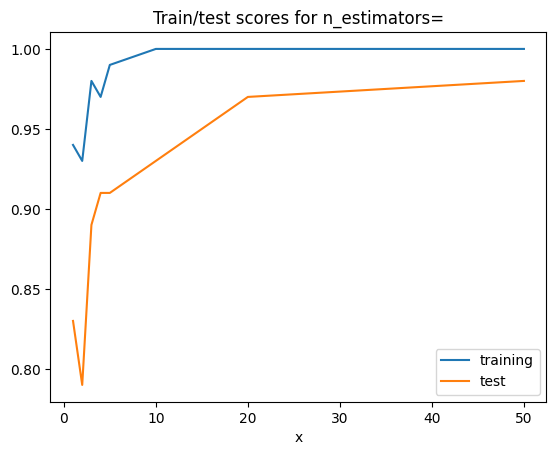

In [27]:
x = [1, 2, 3, 4, 5, 10, 20, 50]

tmp = pd.DataFrame({'x':x, 'training':train_scores, 'test':test_scores})
tmp.set_index('x', inplace=True)
tmp.plot(title='Train/test scores for n_estimators=')